In [3]:
MODEL = 'fine_tuned/NER/ACD_15epochs'
MODEL_PATH = '../../models/word_embeddings/'
MODEL_PATH += MODEL

In [4]:
import os, json

config_name = 'trainer_state.json'
config_file = os.path.join(MODEL_PATH, config_name)
config_json = json.load(open(config_file))
epochs = config_json['log_history']

treino_perda = []
for e in epochs:
    treino_perda.append(e['loss'])

teste_perda = [2.069122314453125, 2.0268731117248535, 0.06653925031423569, 0.03552987053990364, 0.021754520013928413, 0.01020291168242693, 0.007560146506875753, 0.005515111610293388, 0.0030074850656092167, 0.002318189013749361, 0.0020072823390364647, 0.0011709571117535233, 0.0011993682710453868, 0.0010302491718903184, 0.0008933630306273699, 0.0007379970047622919, 0.0006974624702706933]

['bert', 'biobert', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


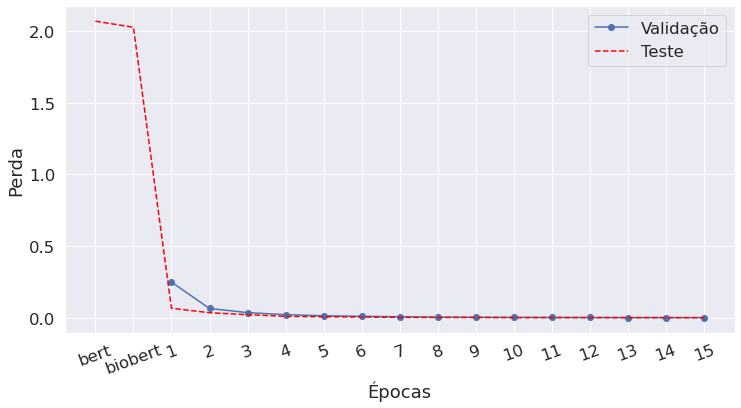

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

indices = [i+1 for i, v in enumerate(treino_perda)]
df = pd.DataFrame({'x': indices, 'perda': treino_perda})
plt.plot(df['x'], df['perda'], 'b-o', label='Validação')

indices = [i-1 for i, v in enumerate(teste_perda)]
df = pd.DataFrame({'x': indices, 'perda': teste_perda})
plt.plot(df['x'], df['perda'], '--', color='red', label='Teste')

xs = ['bert', 'biobert']
[xs.append(x) for x in range(1,16)]
print(xs)
print(np.arange(-1, 16, step=1))
plt.xticks(np.arange(-1, 16, step=1), xs, rotation='20')


plt.xlabel("Épocas")
plt.ylabel("Perda")


plt.legend()
plt.savefig('perda.png', format='png')
plt.show()


In [70]:
precisions = [0.029211815142139656, 0.022912548516022913, 0.8713295269168027, 0.9219305900516883, 0.9444965184788431, 0.9787644787644788, 0.9821748107364074, 0.9877787751156528, 0.9949302034863532, 0.9965251233581208, 0.9968033356497568, 0.9988857938718663, 0.9981910526681973, 0.9983299700786306, 0.9991640543364682, 0.9993037666225719, 0.9994428969359331]                   
recalls = [0.29326554774009334, 0.2211853193119298, 0.8927501915175151, 0.9564732920119785, 0.9824500313392297, 0.988648234556724, 0.9938714395152866, 0.9963089351626158, 0.9977017898182324, 0.9986071453443833, 0.9989553590082875, 0.9989553590082875, 0.99916428720663, 0.99916428720663, 0.9988857162755066, 0.999582143603315, 0.9995125008705341]
f_measures = [0.05313128891636648, 0.04152366757532375, 0.8819098070241822, 0.938884331419196, 0.9630995050349888, 0.983681529986488, 0.9879885077365087, 0.9920255183413078, 0.9963140691285903, 0.9975650480033393, 0.9978781870673762, 0.9989205752289425, 0.9986774328275094, 0.998746954403063, 0.9990248659190639, 0.9994429357287097, 0.9994776976914237]
accucaricies = []

['bert', 'biobert', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


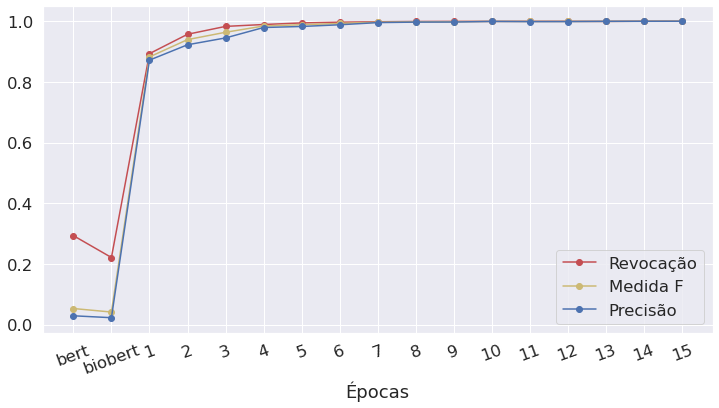

In [71]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(recalls, 'r-o', label="Revocação")
plt.plot(f_measures, 'y-o', label="Medida F")
plt.plot(precisions, 'b-o', label="Precisão")

xs = ['bert', 'biobert']
[xs.append(x) for x in range(1,16)]
print(xs)
# print(np.arange(0, 15, step=1))
plt.xticks(np.arange(0, 17, step=1), xs, rotation='20')


# plt.title("Curva de Perda")
plt.xlabel("Épocas")
plt.legend()

plt.savefig('performance.png', format='png')
plt.show()


NameError: name 'valid_perda' is not defined

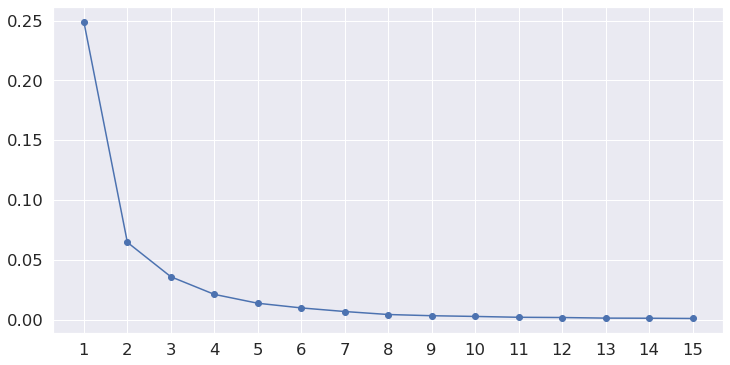

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# plt.xticks(np.arange(len(valid_perda)), np.arange(-1, len(valid_perda)-1))
plt.xticks(np.arange(len(treino_perda)), np.arange(1, len(treino_perda)+1))


# Plot the learning curve.
plt.plot(treino_perda, 'b-o', label="Treinamento")
plt.plot(valid_perda, 'r-o', label="Teste")

# Label the plot.
# plt.title("Curva de Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.savefig('perda.eps', format='eps')
plt.show()


## Performance

In [ ]:
from typing import Dict
from transformers import AutoConfig
# List, Optional, Tuple

def get_labels(path):
    
    # path= '../../NER/ACD/labels.txt'
    with open(path, "r") as f:
        labels = f.read().splitlines()
        labels = [i if i != 'O' else 'O' for i in labels]
    if "O" not in labels:
        labels = ["O"] + labels
    return labels

labels = get_labels('../../datasets/NER/ACD/labels.txt')
num_labels = len(labels)
label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}

config = AutoConfig.from_pretrained(MODEL_PATH,
    num_labels=num_labels,
    id2label=label_map,
    label2id={label: i for i, label in enumerate(labels)},
)
print(config)

In [16]:
# from transformers import AutoModelForTokenClassification

# model = AutoModelForTokenClassification.from_pretrained(
#     MODEL_PATH,
#     from_tf=bool(".ckpt" in MODEL),
#     config=config
# )

In [17]:
# model.eval()
# # Reset the validation loss for this epoch.
# devel_loss, devel_accuracy = 0, 0
# nb_devel_steps, nb_devel_examples = 0, 0
# predictions , true_labels = [], []

# print('len(devel_dataloader) ',len(devel_dataloader))
# for batch in devel_dataloader:
# #     print('len(batch) ',len(batch))
#     batch = tuple(t.to(device) for t in batch)
#     b_input_ids, b_input_mask, b_labels = batch
#     print('b_input_ids ', b_input_ids)
#     print('b_input_mask ', b_input_mask)
#     print('b_labels ', b_labels)

#     # Telling the model not to compute or store gradients,
#     # saving memory and speeding up validation
#     with torch.no_grad():
#         outputs = model(b_input_ids, token_type_ids=None,
#                         attention_mask=b_input_mask, labels=b_labels)
#     print('outputs[0] ', outputs[0])
#     print('outputs[0].mean() ', outputs[0].mean())

#     # Calculate the accuracy for this batch of test sentences.
#     devel_loss += outputs[0].mean().item()
# #     print(devel_loss)
#     predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
# #     true_labels.extend(label_ids)
#     break

# print('devel_loss ',devel_loss)

# devel_loss = devel_loss / len(devel_dataloader)
# print('devel_loss ',devel_loss)
# print('len(devel_dataloader) ',len(devel_dataloader))

# print("Devel loss: {}".format(devel_loss))
# pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
#                               for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
# valid_tags = [tag_values[l_i] for l in true_labels
#                               for l_i in l if tag_values[l_i] != "PAD"]
# print("Devel Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
# print("Devel F1-Score: {}".format(f1_score([pred_tags], [valid_tags])))
# print()


NameError: name 'devel_dataloader' is not defined

# Tese

/tmp/ipykernel_54/2280080526.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0][0].plot(df1_test_f1['x'], df1_test_f1['f1'], 'r-o', color='blue', label='F1 no teste')
/tmp/ipykernel_54/2280080526.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0][0].plot(df1_test_loss['x'], df1_test_loss['perda'], 'r-o', color='red', label='Perda no teste')
/tmp/ipykernel_54/2280080526.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0][1].plot(df2_test_f1['x'], df2_test_f1['f1'], 'r-o', color='blue', label='F1 no teste')
/tmp/ipykernel_54/2280080526.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt st

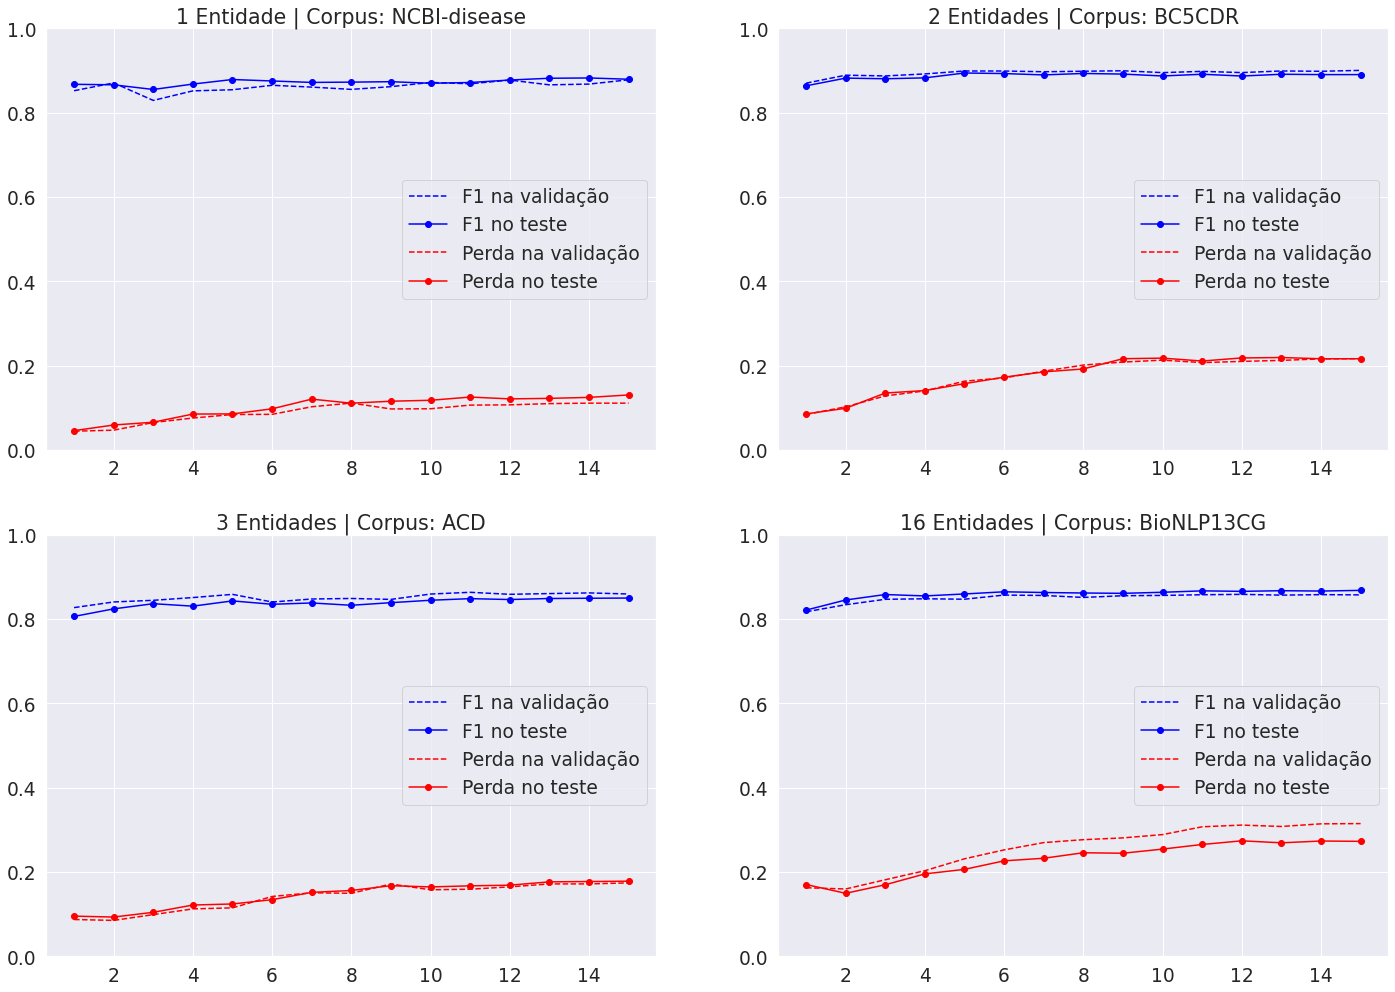

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.rcParams.update({'font.size': 5})
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.7)
plt.rcParams["figure.figsize"] = (20,14)

indices = np.arange(1, 16, step=1)

# NCBI
# perda_treino=[0.242, 0.0422, 0.0222, 0.0135, 0.008, 0.0054, 0.0037, 0.0027, 0.0021, 0.0016, 0.0013, 0.0013, 0.0009, 0.0008, 0.0007]
# perda_treino_lr_5e-5 = [0.0605,0.0253,0.0144,0.0084,0.0065,0.0052,0.0041,0.0025,0.002,0.002,0.0008,0.0004,0.0004,0.0005,0.0003]
# perda_teste = [0.11346697807312012, 0.055551912635564804, 0.04354406148195267, 0.042623959481716156, 0.043783463537693024, 0.048358239233493805, 0.051372312009334564, 0.05360308289527893,0.0572509728372097, 0.0632767304778099, 0.06852328032255173,0.07245273888111115,0.07431916147470474, 0.07688311487436295, 0.07955699414014816]

eval1_f1 = [0.8521739130434782,0.8706315144083385,0.8291770573566085,0.851828890266584,0.8544776119402985,0.865,0.8607435412728419,0.8553459119496856,0.8617886178861788,0.871826625386997,0.8685996298581122,0.8774355751099937,0.8660826032540676,0.867877269881027,0.8780487804878049]
eval1_loss = [0.04494338110089302,0.04734598472714424,0.06554410606622696,0.07614181935787201,0.08445848524570465,0.08489082753658295,0.10288216173648834,0.11156841367483139,0.09768202900886536,0.09816960990428925,0.10675209015607834,0.10736016184091568,0.110362708568573,0.11144538968801498,0.11144515126943588]
test1_loss = [0.046285245567560196,0.0596042163670063,0.06627535074949265,0.08557574450969696,0.0859510749578476,0.0980149582028389,0.12098108977079391,0.1113363727927208,0.1160246729850769,0.11826368421316147,0.12584972381591797,0.12157667428255081, 0.12276522070169449,0.12510327994823456,0.13085873425006866]
test1_f1 = [0.8673726676752396,0.8661654135338346,0.8551020408163265,0.8679245283018868,0.8787417554540843,0.8752556237218815,0.871847658260422,0.8725038402457758,0.873598369011213,0.8698284561049445,0.8716387620497209, 0.8774987186058433,0.8817204301075269,0.8824130879345602,0.8793893129770992]

# perda_treino_large=[0.1062, 0.0293, 0.0168, 0.0095, 0.0051, 0.0033, 0.0032, 0.0028, 0.002, 0.0014, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001]
# perda_teste_large = [0.04673603177070618, 0.05343064293265343, 0.04774734377861023, 0.06812098622322083,0.0537053644657135, 0.07026097178459167, 0.06891816854476929, 0.08388172090053558,0.07797511667013168, 0.08200062811374664, 0.08584363758563995, 0.08676780760288239,0.09008458256721497, 0.09243257343769073, 0.09316516667604446]

df1_eval_f1 = pd.DataFrame({'x': indices, 'f1': eval1_f1})
df1_eval_loss = pd.DataFrame({'x': indices, 'perda': eval1_loss})
df1_test_f1 = pd.DataFrame({'x': indices, 'f1': test1_f1})
df1_test_loss = pd.DataFrame({'x': indices, 'perda': test1_loss})

ax[0][0].set_ylim([0, 1])
ax[0][0].plot(df1_eval_f1['x'], df1_eval_f1['f1'], '--', color='blue', label='F1 na validação')
ax[0][0].plot(df1_test_f1['x'], df1_test_f1['f1'], 'r-o', color='blue', label='F1 no teste')

ax[0][0].plot(df1_eval_loss['x'], df1_eval_loss['perda'], '--', color='red', label='Perda na validação')
ax[0][0].plot(df1_test_loss['x'], df1_test_loss['perda'], 'r-o', color='red', label='Perda no teste')

# ax[0][0].set_xlabel("Épocas")
# ax[0][0].set_ylabel("Taxa de Erro")
ax[0][0].legend()
ax[0][0].title.set_text("1 Entidade | Corpus: NCBI-disease")


##### BC5CDR disease/quemical

perda_eval = [0.07558609545230865, 0.08240632712841034, 0.09614250808954239, 0.13131247460842133, 0.13427282869815826, 0.16209882497787476, 0.1644369661808014, 0.1782168745994568, 0.1790374219417572, 0.19150814414024353, 0.20027706027030945,0.19593001902103424, 0.1966080367565155, 0.19942158460617065,0.1995972841978073]
# perda_treino2=[0.3009, 0.0634, 0.0379, 0.0246, 0.0165, 0.0115, 0.008, 0.0063, 0.0046, 0.0037, 0.0028, 0.0024, 0.0024, 0.002, 0.002] 
perda_teste2 = [0.13631464540958405, 0.07899278402328491, 0.07369395345449448, 0.07181507349014282, 0.07434109598398209, 0.08095277100801468, 0.08824150264263153, 0.09242662787437439, 0.09672744572162628, 0.10157956928014755, 0.10728141665458679, 0.11211907118558884, 0.11758284270763397, 0.11825259774923325, 0.12289009988307953]
perda_treino_large2 = [0.1129, 0.0392, 0.0204, 0.0103, 0.0064,0.0044, 0.0037, 0.0041, 0.0014, 0.0022, 0.0017, 0.0026, 0.0019, 0.0023, 0.0031]
perda_teste_large2 = [0.07448294013738632, 0.07745637744665146, 0.09494827687740326, 0.10143187642097473,0.11567673832178116, 0.11996781826019287, 0.12309041619300842, 0.11486415565013885,0.13288089632987976, 0.13886398077011108, 0.1426146775484085, 0.15126049518585205,0.1508987993001938, 0.15413853526115417, 0.15471462905406952]

f1_eval = [0.8870537038868559, 0.8938722031848417, 0.903457702627449, 0.8964035964035965, 0.8992950654582075, 0.9025810987245154, 0.8965620180108463, 0.9005753507620874, 0.9027491581645474, 0.8998746553020807, 0.9001358353876341, 0.9039358896327857, 0.9034145357341,0.9050932929904185,0.9048243843358902]


# 'total_flos': 1.1395873498464e+16, 'epoch': 15.0, 'step': 540


eval2_f1 = [0.8700308959835221,0.8890169171947834,0.8872203493717437,0.8919792682301022,0.8989394884591392,0.8988799166449596,0.8971128608923885,0.8983558333771077,0.8994424943217015,0.8950804503161466,0.8980506619409987,0.8951683597174238,0.8990008800538386,0.8982503645073944,0.9004004784937847]
eval2_loss = [0.08464086055755615,0.10269996523857117,0.12860740721225739,0.14044451713562012,0.16353288292884827,0.171352356672287,0.18721310794353485,0.2017427384853363,0.20879577100276947,0.2134334146976471,0.20759199559688568,0.21038788557052612,0.21282711625099182,0.21636691689491272,0.21687811613082886]
test2_f1 = [0.8637611701862112,0.882065383440269,0.880514978955187,0.8826309766655057,0.8941649899396378,0.8928607594936709,0.8896389485527256,0.8930830442766783,0.8915963449343386,0.8871119940402284,0.8912319644839068,0.8869825436408977,0.8912108789121089,0.8903661177418543,0.8903661177418543]
test2_loss = [0.08591328561306,0.0992416962981224,0.13543346524238586,0.14131155610084534,0.15765661001205444,0.17296139895915985,0.18554359674453735,0.19250310957431793,0.2168213576078415,0.218182772397995,0.21129508316516876,0.21863216161727905,0.21962890028953552,0.21669860184192657,0.21669860184192657]


df2_eval_f1 = pd.DataFrame({'x': indices, 'f1': eval2_f1})
df2_test_f1 = pd.DataFrame({'x': indices, 'f1': test2_f1})
df2_eval_loss = pd.DataFrame({'x': indices, 'perda': eval2_loss})
df2_test_loss = pd.DataFrame({'x': indices, 'perda': test2_loss})

ax[0][1].set_ylim([0, 1])
ax[0][1].plot(df2_eval_f1['x'], df2_eval_f1['f1'], '--', color='blue', label='F1 na validação')
ax[0][1].plot(df2_test_f1['x'], df2_test_f1['f1'], 'r-o', color='blue', label='F1 no teste')

ax[0][1].plot(df2_eval_loss['x'], df2_eval_loss['perda'], '--', color='red', label='Perda na validação')
ax[0][1].plot(df2_test_loss['x'], df2_test_loss['perda'], 'r-o', color='red', label='Perda no teste')

# ax[1][0].set_xlabel("Épocas")
# ax[1][0].set_ylabel("Taxa de Erro")
ax[0][1].legend()
ax[0][1].title.set_text("2 Entidades")

# ax[1][0].set_xlabel("Épocas")
# ax[1][0].set_ylabel("Taxa de Erro")
ax[0][1].legend()
ax[0][1].title.set_text("2 Entidades | Corpus: BC5CDR")

# AQD

eval3_f1 = [0.8266798094299326,0.840119490935876,0.8439914790526711,0.8505116046917893,0.8580849820519243,0.8399744843716778,0.8470734744707349,0.8483741019145313, 0.8461570610607264,0.85885911114845,0.862974497096204,0.8582198952879581,0.8599691139029175,0.8615384615384615,0.8589894242068155]
test3_f1 = [0.8057674294125518,0.8236986484678175,0.8359633277666065,0.8301451634784969,0.8426178153091801,0.8345820529641267,0.8377111643119668,0.8322242864381016,0.8384068569096289,0.8441465166387361,0.8479540166963185,0.8458446866485014,0.8482828969738185,0.8488884335621351,0.8493384841543878]

eval3_loss = [0.08721056580543518,0.08510863035917282,0.0988132655620575,0.11237765848636627,0.11485940217971802,0.1418791115283966,0.15058395266532898,0.1493435800075531,0.17138367891311646,0.15767791867256165,0.15905322134494781,0.16463680565357208,0.17158456146717072,0.17163939774036407,0.17402765154838562]
test3_loss = [0.09525298327207565,0.0930899903178215,0.10429758578538895,0.1215696930885315,0.12406127899885178,0.13423842191696167,0.15157562494277954,0.15605291724205017,0.16740010678768158,0.16448794305324554,0.16707326471805573,0.16861315071582794,0.1765042245388031,0.17730511724948883,0.17808516323566437 ]

# perda_large_eval_3 = [0.11011547595262527, 0.0925692543387413, 0.08701155334711075, 0.08490310609340668, 0.09091523289680481, 0.10536611080169678, 0.10984687507152557, 0.12169069796800613, 0.1247805655002594, 0.13375012576580048, 0.13485294580459595, 0.13076777756214142, 0.13991287350654602,0.15070918202400208, 0.14960816502571106]
# f1_large_eval_3 = [0.7443111294993794, 0.8071059260241282, 0.8174560579632363, 0.8382490324302683, 0.8415014591929154, 0.836211830454836,  0.8475054594322191, 0.8497883149872989, 0.8458176643967882, 0.8497027830316131, 0.8467875911171385, 0.8447184047426569, 0.8502527667714168, 0.8524056555792899, 0.8507447494316832]

# f1_eval3 = [0.817557926207787,  0.8417558596396153, 0.8438533627342889, 0.8467856900414092, 0.8444854953475643, 0.8465244785875534, 0.8473099395454085, 0.8540841967574266, 0.8528908655490933, 0.8511866363358571, 0.8537679323449857, 0.8565551289083928, 0.8588625560001368, 0.8578048863597643, 0.8572010869565219]
# perda_base_eval3=[0.08482662588357925, 0.08453863859176636,0.09275612980127335, 0.10116323083639145, 0.11268562823534012, 0.1250191330909729, 0.13446427881717682, 0.13705088198184967, 0.14936712384223938,0.15399952232837677, 0.15623386204242706, 0.16082853078842163, 0.16380049288272858, 0.16789238154888153, 0.16844724118709564]
            
# perda_treino3=[0.5587, 0.1615, 0.0928, 0.0663, 0.05, 0.0388, 0.03, 0.0244, 0.0201, 0.0173, 0.0155, 0.0137, 0.0122, 0.0118, 0.0112]
# perda_teste3 = [0.32455557584762573, 0.19062744081020355, 0.13075338304042816, 0.10509354621171951,0.09488772600889206, 0.09120786190032959, 0.08966801315546036, 0.09035208821296692,0.09206537902355194, 0.09568645805120468, 0.09960988163948059, 0.10215939581394196,0.10486035794019699, 0.10977619886398315, 0.1131979376077652]

# perda_treino_large=[0.1062, 0.0293, 0.0168, 0.0095, 0.0051, 0.0033, 0.0032, 0.0028, 0.002, 0.0014, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001]
# perda_treino_large3 = [0.3651, 0.0672, 0.0266, 0.0127, 0.0075, 0.0056, 0.0033, 0.0022, 0.0016, 0.0012, 0.0005, 0.0004, 0.0005, 0.0002, 0.0002]
# perda_teste_large3 = [0.09639547020196915, 0.08523271977901459, 0.08907313644886017, 0.1010003313422203, 0.1245870366692543, 0.12430598586797714, 0.13244543969631195, 0.1327216923236847, 0.13836459815502167, 0.14552979171276093, 0.15946102142333984, 0.16205251216888428, 0.16146370768547058, 0.16373836994171143, 0.1652805507183075]

df3_eval_f1 = pd.DataFrame({'x': indices, 'f1': eval3_f1})
df3_test_f1 = pd.DataFrame({'x': indices, 'f1': test3_f1})

df3_eval_loss = pd.DataFrame({'x': indices, 'perda': eval3_loss})
df3_test_loss = pd.DataFrame({'x': indices, 'perda': test3_loss})

# df3_large_eval = pd.DataFrame({'x': indices, 'perda': perda_large_eval_3})
# df3teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large3})

# df3_f1_large_eval = pd.DataFrame({'x': indices, 'f1': f1_large_eval_3})



ax[1][0].set_ylim([0, 1])
ax[1][0].plot(df3_eval_f1['x'], df3_eval_f1['f1'], '--', label='F1 na validação', color='blue')
ax[1][0].plot(df3_test_f1['x'], df3_test_f1['f1'], 'b-o', label='F1 no teste', color='blue')

ax[1][0].plot(df3_eval_loss['x'], df3_eval_loss['perda'], '--', label='Perda na validação', color='red')
ax[1][0].plot(df3_test_loss['x'], df3_test_loss['perda'], 'b-o', label='Perda no teste', color='red')


# ax[1][0].plot(df3_base_test['x'], df3_base_test['perda'], '--', color='red', label='Validação (large)')
# ax[1][0].plot(df3treino_large['x'], df3treino_large['perda'], 'b-o', color='red', label='Treino (large)')
# ax[1][0].plot(df3teste_large['x'], df3teste_large['perda'], '--', color='red', label='Teste (large)')

# ax[2][0].set_xlabel("Épocas")
# ax[2][0].set_ylabel("Taxa de Erro")
ax[1][0].legend()
# ax[1][0].title.set_text("3 Entidades")


ax[1][0].set_ylim([0, 1])



ax[1][0].legend()
ax[1][0].title.set_text("3 Entidades | Corpus: ACD")



# BioNLP13CG

# f1_on_eval16 = [0.3909738337200928, 0.5367318435754189, 0.629305477131564, 0.6905823250548362, 0.7181722319859404, 0.7454131702460532, 0.7515941618251382,0.7557876905702993, 0.7625097042840003, 0.767775188872414, 0.7752290320289752,  0.7773761428875187, 0.7778407480872768,  0.779557697760136, 0.7788400254939453]
# loss_on_eval16 = [0.5941361784934998, 0.403329074382782, 0.3232409656047821, 0.28092890977859497, 0.25700387358665466, 0.2360130399465561, 0.22421906888484955, 0.2170834094285965, 0.21261753141880035, 0.2077261358499527, 0.20360088348388672, 0.20232778787612915, 0.20095038414001465, 0.20017534494400024, 0.20026132464408875]

eval4_loss = [0.1625780463218689,0.15958203375339508,0.18150755763053894,0.2029603123664856,0.23116901516914368,0.2522576153278351,0.26958948373794556,0.27650186419487,0.28072991967201233,0.28852418065071106,0.3070545196533203,0.3110961318016052,0.3077835440635681,0.3140501379966736,0.3146361708641052]
eval4_f1 = [0.8167680865449628,0.8335146898803046,0.8463949843260187,0.8476281092836754,0.8466056549651686,0.8564025637528979,0.8554913294797687,0.8508196721311475,0.8548409121944558,0.855620816828302,0.8571822063076711,0.8581267217630854,0.8562800274536718,0.8574561403508771,0.8568689220654705]

test4_loss = [0.1701652556657791,0.1493375152349472,0.16965822875499725,0.19537106156349182,0.2060990184545517,0.2263094186782837,0.23246492445468903,0.24548256397247314,0.24435435235500336,0.2541700005531311,0.26511260867118835,0.2737855315208435,0.2690355181694031,0.2733139395713806,0.2725367546081543]
test4_f1 = [0.8207762557077626,0.8447622452627815,0.8576967260195291,0.8543926442065943,0.8590546082451974,0.8641815700639229,0.8625036221385107,0.8613180515759312,0.8605366726296958,0.8630520646319569,0.8664014466546112,0.865252335095214,0.8667579448007494,0.8659451659451659,0.8675601671710622]



# perda_treino4 = [1.5673,0.4987,0.2614,0.165,0.122,0.0947,0.0766,0.0642,0.0545,0.0468,0.0413,0.0372,0.0344,0.0323,0.0317]
# perda_teste4 = [0.6731739640235901,0.3382066786289215,0.22780629992485046,0.18965987861156464,0.17242549359798431,0.16921889781951904,0.1656051129102707,0.16597753763198853,0.167391836643219,0.16827434301376343,0.1694881170988083,0.17035692930221558,0.17106731235980988,0.17280933260917664,0.1732468456029892]
# perda_treino_large4 = [1.1983, 1.1499, 1.1479, 1.1459,1.1651, 1.1457,1.1454,1.1445,1.1427,1.1407,1.1397,1.1422,1.1431,1.1402,1.1384]
# perda_teste_large4 = [1.125075340270996, 1.127468466758728, 1.1287904977798462, 1.124761939048767, 1.1269515752792358, 1.1279443502426147,1.1262091398239136,1.126111388206482,1.1255393028259277,1.122671127319336,1.1232846975326538,1.1275737285614014,1.1235332489013672,1.1230101585388184,1.1231106519699097]


df4_eval_loss = pd.DataFrame({'x': indices, 'perda': eval4_loss})
df4_test_loss = pd.DataFrame({'x': indices, 'perda': test4_loss})
df4_eval_f1 = pd.DataFrame({'x': indices, 'f1': eval4_f1})
df4_test_f1 = pd.DataFrame({'x': indices, 'f1': test4_f1})

ax[1][1].set_ylim([0, 1])
ax[1][1].plot(df4_eval_f1['x'], df4_eval_f1['f1'], '--', label='F1 na validação',  color='blue')
ax[1][1].plot(df4_test_f1['x'], df4_test_f1['f1'], 'b-o', label='F1 no teste',  color='blue')

ax[1][1].plot(df4_eval_loss['x'], df4_eval_loss['perda'], '--', label='Perda na validação', color='red')
ax[1][1].plot(df4_test_loss['x'], df4_test_loss['perda'], 'b-o', label='Perda no teste', color='red')


ax[1][1].legend()
ax[1][1].title.set_text("16 Entidades | Corpus: BioNLP13CG")

plt.savefig('performance.eps', format='eps')

/tmp/ipykernel_55/600827148.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(df4bert['x'], df4bert['perda'], 'r-o', color='black', label='5$e^{-5}$')
/tmp/ipykernel_55/600827148.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(df3bert['x'], df3bert['perda'], 'r-o', color='red', label='4$e^{-5}$')
/tmp/ipykernel_55/600827148.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(df2bert['x'], df2bert['perda'], 'r-o', color='magenta', label='3$e^{-5}$')
/tmp/ipykernel_55/600827148.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword a

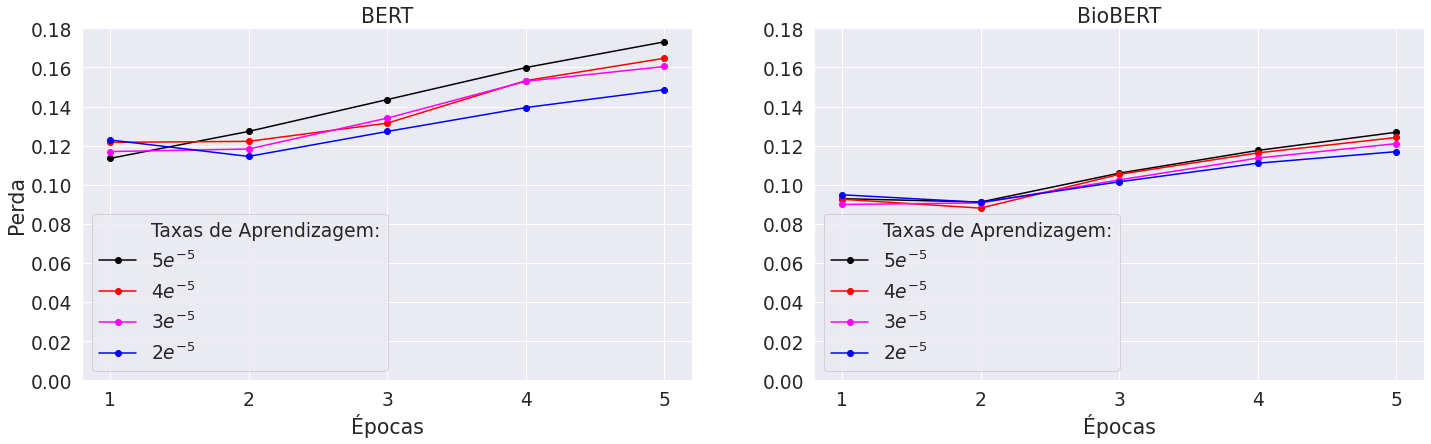

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
# plt.rcParams.update({'font.size': 5})
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.7)
plt.rcParams["figure.figsize"] = (20,6)

indices = np.arange(1, 6, step=1)

test_loss = [0.09488096833229065, 0.09102568030357361, 0.10151083022356033, 0.11104144901037216, 0.11695823073387146]
test_loss2 = [0.08992715924978256, 0.09071396291255951, 0.10248763859272003, 0.11365246772766113, 0.12107089161872864]
test_loss3 = [0.0926070287823677, 0.08806546777486801, 0.10532937198877335, 0.11630618572235107, 0.1242031455039978]
test_loss4 = [0.092904232442379, 0.09117446839809418, 0.10593974590301514, 0.11756765097379684, 0.12688523530960083]

bert_test_loss = [0.122929647564888,0.11450432240962982,0.12725766003131866,0.1394907385110855,0.14862577617168427]
bert_test_loss2 = [0.11698895692825317,0.11828196048736572,0.13409683108329773,0.15292376279830933,0.16050651669502258]
bert_test_loss3 = [0.12169305235147476, 0.12221653014421463,0.1315142661333084,0.15325312316417694,0.16471676528453827]
bert_test_loss4 = [0.11348380893468857,0.12728530168533325,0.14356671273708344,0.15996402502059937,0.17311522364616394]

df1teste = pd.DataFrame({'x': indices, 'perda': test_loss})
df2test = pd.DataFrame({'x': indices, 'perda': test_loss2})
df3test = pd.DataFrame({'x': indices, 'perda': test_loss3})
df4test = pd.DataFrame({'x': indices, 'perda': test_loss4})

df1bert = pd.DataFrame({'x': indices, 'perda': bert_test_loss})
df2bert = pd.DataFrame({'x': indices, 'perda': bert_test_loss2})
df3bert = pd.DataFrame({'x': indices, 'perda': bert_test_loss3})
df4bert = pd.DataFrame({'x': indices, 'perda': bert_test_loss4})

ax[0].plot([], [], ' ', label="Taxas de Aprendizagem:")
ax[0].plot(df4bert['x'], df4bert['perda'], 'r-o', color='black', label='5$e^{-5}$')
ax[0].plot(df3bert['x'], df3bert['perda'], 'r-o', color='red', label='4$e^{-5}$')
ax[0].plot(df2bert['x'], df2bert['perda'], 'r-o', color='magenta', label='3$e^{-5}$')
ax[0].plot(df1bert['x'], df1bert['perda'], 'b-o', color='blue', label='2$e^{-5}$')

ax[0].legend()
ax[0].title.set_text("BERT")
ax[0].set_ylim([0, 0.18])
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("Perda")
ax[0].xaxis.set_ticks(np.arange(1, 6, 1))


ax[1].plot([], [], ' ', label="Taxas de Aprendizagem:")
ax[1].plot(df4test['x'], df4test['perda'], 'r-o', color='black', label='5$e^{-5}$')
ax[1].plot(df3test['x'], df3test['perda'], 'r-o', color='red', label='4$e^{-5}$')
ax[1].plot(df2test['x'], df2test['perda'], 'r-o', color='magenta', label='3$e^{-5}$')
ax[1].plot(df1teste['x'], df1teste['perda'], 'b-o', color='blue', label='2$e^{-5}$')

ax[1].legend()
ax[1].title.set_text("BioBERT")
ax[1].set_ylim([0, 0.18])
ax[1].set_xlabel("Épocas")

ax[1].xaxis.set_ticks(np.arange(1, 6, 1))

plt.savefig('perda.eps', format='eps')

In [ ]:
precisao = [0.813640730067243,0.8166986564299424,0.860655737704918,0.8618556701030928,0.8598984771573605,0.8338278931750742,0.8583078491335372,0.8606307222787386,0.8543983822042467,0.8468468468468469,0.8770833333333333,0.8718209562563581,0.8695208970438328,0.8547094188376754,0.8538538538538538]
revocacao = [0.8822916666666667,0.8864583333333333,0.875,0.8708333333333333,0.8822916666666667,0.878125,0.8770833333333333,.88125,0.8802083333333334,0.88125,0.8770833333333333,0.8927083333333333,0.8885416666666667,0.8885416666666667,0.8885416666666667]

In [47]:
accucaricies = []

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


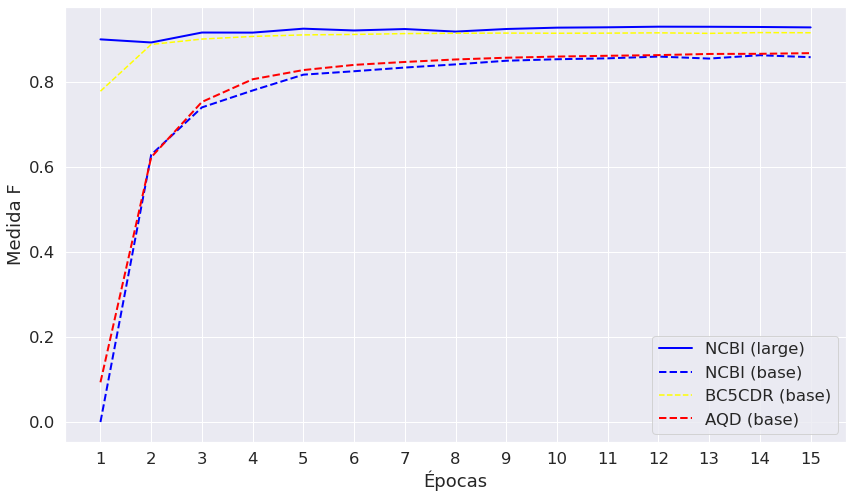

In [23]:
# f1_ncbi_base = [0.8465767116441779,0.8501498501498502,0.8677685950413223,0.8663212435233161,0.8709511568123393,0.8554033485540335,0.8675940236991242,0.8708183221821924,0.8671113391482812,0.8637059724349159,0.8770833333333333,0.8821410190427175, 0.8789283874291602,0.8712972420837589,0.8708524757529351]
f1_ncbi_base_lr_1e5 = [0.0,0.6286329386437028,0.7401267674305216,0.7799113737075333,0.8171513060620996,0.8252092565238799,0.8339117501239466,0.8413320274240941,0.8499005964214713,0.8534525583705912,0.8555831265508684,0.8596926127912742,0.8550148957298908,0.8628428927680799,0.8582794629537543]
f1_ncbi_large = [0.9001788908765653,0.892882818116463,0.9162595952547105,0.9160571229536747,0.9253314724354501,0.9211160868067517,0.9244819107832806,0.9184931506849314,0.9245674740484429,0.9277357192016517,0.9285714285714285,0.93000693000693,0.9298123697011813,0.9293139293139292,0.9283489096573209 ]

f_measure_BC5CDR_base = [0.7782979654342594, 0.888265306122449, 0.9008575170024924, 0.907081526821389, 0.9107081765309615, 0.9117572047946954, 0.9137505321413367, 0.9144952876455287, 0.914933675652546, 0.9146012585077695, 0.9148281169830682, 0.9155369285378265, 0.9142954797915065, 0.9161052225035403, 0.9157462111482149]
f_measure_AQD_base = [0.0934509489441326, 0.622810943047227, 0.7530149405484792, 0.8063093901470547, 0.8279843119924875, 0.8401563236231602, 0.8470425649530128, 0.8528931113757859, 0.8569998609759489,  0.8597056373229658, 0.8615915030862482, 0.8631380276999084, 0.8658901086622531, 0.8662015071169411, 0.8677896030615381]

# import numpy as np
import seaborn as sns
# import pandas as pd
import matplotlib.pyplot as plt

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (14,8)


# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(f1_ncbi_large, 'b-', color='blue', label="NCBI (large)", linewidth=2)
plt.plot(f1_ncbi_base_lr_1e5, '--', color='blue', label="NCBI (base)", linewidth=2)

plt.plot(f_measure_BC5CDR_base, '--', color='yellow', label="BC5CDR (base)")
# plt.plot(f_measure_BC5CDR_large, '--', color='blue', label="BC5CDR (large)",linewidth=2)

plt.plot(f_measure_AQD_base, '--', color='red', label="AQD (base)", linewidth=2)
# plt.plot(f_measure_AQD_large, '--', color ='red', label="AQD (large)", linewidth=2)


# plt.plot(f_measure_BioNLP13CG_base, 'y-', color ='yellow', label="BioNLP13CG (base)", linewidth=2)
# plt.plot(f_measure_BioNLP13CG_large, '--', color ='yellow', label="BioNLP13CG (large)", linewidth=2)

xs = []
[xs.append(x) for x in range(1,16)]
# print(np.arange(0, 15, step=1))
plt.xticks(np.arange(0, 15), xs)


# plt.title("Performance so")
plt.xlabel("Épocas")
plt.ylabel("Medida F")

plt.legend()

plt.savefig('performance.eps', format='eps')
plt.show()


## CSCW fig

/tmp/ipykernel_88/3166134350.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  ax[0].plot(df1teste['x'], df1teste['perda'], 'b-o', color='blue', label='Test (base)')
/tmp/ipykernel_88/3166134350.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(df1teste_large['x'], df1teste_large['perda'], 'r-o', color='red', label='Test (large)')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


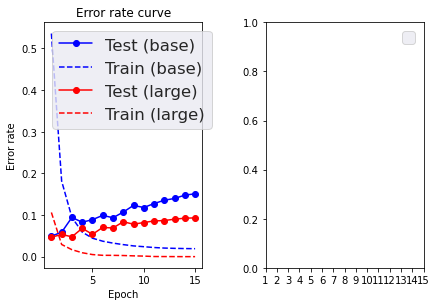

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
# plt.rcParams.update({'font.size': 5})
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,4)

indices = np.arange(1, 16, step=1)
xs = []
[xs.append(x) for x in range(1,16)]
plt.xticks(np.arange(0, 15), xs)



# NCBI
# perda_treino=[0.242, 0.0422, 0.0222, 0.0135, 0.008, 0.0054, 0.0037, 0.0027, 0.0021, 0.0016, 0.0013, 0.0013, 0.0009, 0.0008, 0.0007]
# perda_treino_lr_5e-5 = [0.0605,0.0253,0.0144,0.0084,0.0065,0.0052,0.0041,0.0025,0.002,0.002,0.0008,0.0004,0.0004,0.0005,0.0003]
perda_treino_lr_1e5 = [0.5358,0.1815,0.0943,0.0591,0.0444,0.0372,0.0326,0.029,0.0259,0.024,0.022,0.0207,0.02,0.0195,0.0192]

# perda_teste = [0.11346697807312012, 0.055551912635564804, 0.04354406148195267, 0.042623959481716156, 0.043783463537693024, 0.048358239233493805, 0.051372312009334564, 0.05360308289527893,0.0572509728372097, 0.0632767304778099, 0.06852328032255173,0.07245273888111115,0.07431916147470474, 0.07688311487436295, 0.07955699414014816]
perda_teste = [0.04934130981564522,0.05874865874648094,0.09429509192705154,0.08273377269506454,0.08888518065214157,
               0.09925306588411331,0.0934862568974495,0.10709076374769211,0.12316763401031494,0.11807524412870407,
               0.12752602994441986,0.1355993002653122,0.13980543613433838,0.14783574640750885,0.15096993744373322]

perda_treino_large=[0.1062, 0.0293, 0.0168, 0.0095, 0.0051, 0.0033, 0.0032, 0.0028, 0.002, 0.0014, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001]
perda_teste_large = [0.04673603177070618, 0.05343064293265343, 0.04774734377861023, 0.06812098622322083,0.0537053644657135, 0.07026097178459167, 0.06891816854476929, 0.08388172090053558,0.07797511667013168, 0.08200062811374664, 0.08584363758563995, 0.08676780760288239,0.09008458256721497, 0.09243257343769073, 0.09316516667604446]

df1treino = pd.DataFrame({'x': indices, 'perda': perda_treino_lr_1e5})
df1teste = pd.DataFrame({'x': indices, 'perda': perda_teste})
df1treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large})
df1teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large})

ax[0].plot(df1teste['x'], df1teste['perda'], 'b-o', color='blue', label='Test (base)')
ax[0].plot(df1treino['x'], df1treino['perda'], '--', color='blue', label='Train (base)')

ax[0].plot(df1teste_large['x'], df1teste_large['perda'], 'r-o', color='red', label='Test (large)')
ax[0].plot(df1treino_large['x'], df1treino_large['perda'], '--', color='red', label='Train (large)')

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Error rate")
ax[0].legend()
ax[0].title.set_text("Error rate curve")


# BC5CDR disease/quemical
perda_treino2=[0.3009, 0.0634, 0.0379, 0.0246, 0.0165, 0.0115, 0.008, 0.0063, 0.0046, 0.0037, 0.0028, 0.0024, 0.0024, 0.002, 0.002] 
perda_teste2 = [0.13631464540958405, 0.07899278402328491, 0.07369395345449448, 0.07181507349014282, 0.07434109598398209, 0.08095277100801468, 0.08824150264263153, 0.09242662787437439, 0.09672744572162628, 0.10157956928014755, 0.10728141665458679, 0.11211907118558884, 0.11758284270763397, 0.11825259774923325, 0.12289009988307953]
perda_treino_large2 = [0.1129, 0.0392, 0.0204, 0.0103, 0.0064,0.0044, 0.0037, 0.0041, 0.0014, 0.0022, 0.0017, 0.0026, 0.0019, 0.0023, 0.0031]
perda_teste_large2 = [0.07448294013738632, 0.07745637744665146, 0.09494827687740326, 0.10143187642097473,0.11567673832178116, 0.11996781826019287, 0.12309041619300842, 0.11486415565013885,0.13288089632987976, 0.13886398077011108, 0.1426146775484085, 0.15126049518585205,0.1508987993001938, 0.15413853526115417, 0.15471462905406952]

df2treino = pd.DataFrame({'x': indices, 'perda': perda_treino2})
df2teste = pd.DataFrame({'x': indices, 'perda': perda_teste2})
df2treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large2})
df2teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large2})

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("F1 score")
ax[1].legend()
ax[1].title.set_text("Performance")


f1_base = [0.0,0.6286329386437028,0.7401267674305216,0.7799113737075333,0.8171513060620996,0.8252092565238799,0.8339117501239466,0.8413320274240941,0.8499005964214713,0.8534525583705912,0.8555831265508684,0.8596926127912742,0.8550148957298908,0.8628428927680799,0.8582794629537543]
f1_large = [0.9001788908765653,0.892882818116463,0.9162595952547105,0.9160571229536747,0.9253314724354501,0.9211160868067517,0.9244819107832806,0.9184931506849314,0.9245674740484429,0.9277357192016517,0.9285714285714285,0.93000693000693,0.9298123697011813,0.9293139293139292,0.9283489096573209 ]



# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(f1_large, 'b-o', color='red', label="large", linewidth=2)
plt.plot(f1_base, 'b-o', color='blue', label="base", linewidth=2)

# plt.xlabel("Épocas")
# plt.ylabel("Medida F")

plt.legend()



plt.savefig('error_and_performance.eps', format='eps')
